# Verbform Collocations

In [1]:
from scripts.imports import *
out = Exporter(paths['outdir'], 'semantics')

# NB: here we will restrict clauses to those not headed by wayehi;
# these are dependent clauses where the verb does not act as a verb (Harmelink2011:275)
df_wayehi = df_sg[(df_sg.verb_text == 'יהי') & (df_sg.verbform == 'wayq')]
df_cl = df_sg[~df_sg.index.isin(df_wayehi.index)]

In [2]:
print(df.shape)
print(df_sg.shape)
print(df_cl.shape)

(3648, 72)
(2575, 72)
(2450, 72)


In [3]:
df.head()

,verse,book,booksuper,canon_part,period,times_etcbc,times_utf8,times_utf8d,times_POS,TA Heads,...,ADJV,TIMEAPPO,SPEC,SFX3,SFX,DU,SFX1,SFX2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427553,Genesis 1:1,Genesis,Genesis,Law,SBH,R>CJT/,ראשׁית,תישאר,NOUN,\texthebrew{ראשית},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427680,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427682,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427693,Genesis 2:5,Genesis,Genesis,Law,SBH,VRM/,טרם,םרט,PREP,\texthebrew{טרם},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427694,Genesis 2:5,Genesis,Genesis,Law,SBH,VRM/,טרם,םרט,PREP,\texthebrew{טרם},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_sg.head()

,verse,book,booksuper,canon_part,period,times_etcbc,times_utf8,times_utf8d,times_POS,TA Heads,...,ADJV,TIMEAPPO,SPEC,SFX3,SFX,DU,SFX1,SFX2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427553,Genesis 1:1,Genesis,Genesis,Law,SBH,R>CJT/,ראשׁית,תישאר,NOUN,\texthebrew{ראשית},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427680,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427682,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427805,Genesis 3:8,Genesis,Genesis,Law,SBH,RWX/,רוח,חור,NOUN,\texthebrew{רוח},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427835,Genesis 3:14,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Verb Form

In [5]:
vf_ct = df_cl.pivot_table(
    index='quality',
    columns='verbform',
    aggfunc='size',
    fill_value=0,
)

vf_ct.drop(['infa', 'infc'], axis=1, inplace=True)

vf_ct = vf_ct.loc[vf_ct.sum(1).sort_values(ascending=False).index]

vf_pr = vf_ct.div(vf_ct.sum(1), 0)


vf_ct

verbform,cohoF,impv,jussF,ptcp,qtl,wayq,wqtl,yqtl,Ø
quality,,,,,,,,,
location,8,37,7,105,301,222,126,305,123
duration,7,16,4,46,182,170,84,261,85
sequence,0,0,0,3,41,22,1,28,10
iteration,1,4,0,5,2,1,3,8,9


In [6]:
vf_pr

verbform,cohoF,impv,jussF,ptcp,qtl,wayq,wqtl,yqtl,Ø
quality,,,,,,,,,
location,0.006483,0.029984,0.005673,0.085089,0.243922,0.179903,0.102107,0.247164,0.099676
duration,0.008187,0.018713,0.004678,0.053801,0.212865,0.198830,0.098246,0.305263,0.099415
sequence,0.000000,0.000000,0.000000,0.028571,0.390476,0.209524,0.009524,0.266667,0.095238
iteration,0.030303,0.121212,0.000000,0.151515,0.060606,0.030303,0.090909,0.242424,0.272727


In [7]:
vf_pr2 = vf_ct.T.div(vf_ct.T.sum(1), 0)

vf_pr2

quality,location,duration,sequence,iteration
verbform,,,,
cohoF,0.500000,0.437500,0.000000,0.062500
impv,0.649123,0.280702,0.000000,0.070175
jussF,0.636364,0.363636,0.000000,0.000000
ptcp,0.660377,0.289308,0.018868,0.031447
qtl,0.572243,0.346008,0.077947,0.003802
wayq,0.534940,0.409639,0.053012,0.002410
wqtl,0.588785,0.392523,0.004673,0.014019
yqtl,0.506645,0.433555,0.046512,0.013289
Ø,0.541850,0.374449,0.044053,0.039648


In [8]:
vf_fs, vf_odds = sig.apply_fishers(vf_ct, 0, 1)

vf_fs

,cohoF,impv,jussF,ptcp,qtl,wayq,wqtl,yqtl,Ø
location,-0.095893,0.752641,0.117067,2.211660,0.467379,-0.385527,0.506789,-2.204169,-0.139786
duration,0.098385,-0.890790,0.000000,-1.956440,-1.343039,0.619360,0.083782,2.421682,-0.111360
sequence,0.000000,-0.956739,0.000000,-1.085483,3.457567,0.282520,-3.306427,0.000000,0.000000
iteration,0.671377,2.041850,0.000000,1.089241,-1.897416,-1.675426,0.000000,-0.073368,2.358939


In [9]:
vf_dp = sig.apply_deltaP(vf_ct, 0, 1)
vf_dp2 = sig.apply_deltaP(vf_ct.T, 0, 1)

vf_dp

verbform,cohoF,impv,jussF,ptcp,qtl,wayq,wqtl,yqtl,Ø
quality,,,,,,,,,
location,-0.001573,0.009843,0.001644,0.030708,0.017336,-0.014458,0.013487,-0.051930,-0.005057
duration,0.001627,-0.011170,-0.000424,-0.028560,-0.037863,0.020259,0.003493,0.056721,-0.004083
sequence,-0.007540,-0.026861,-0.005184,-0.044944,0.161918,0.024321,-0.090853,-0.003833,-0.007024
iteration,0.023466,0.097055,-0.005014,0.081324,-0.178227,-0.158393,-0.005262,-0.028314,0.173365


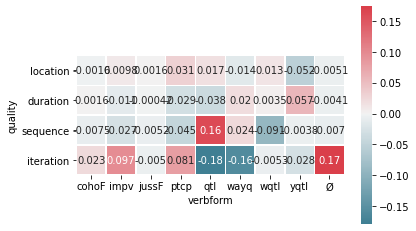

In [10]:
heatmap(vf_dp, annot=True)

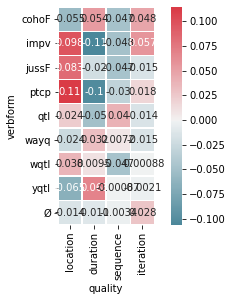

In [11]:
heatmap(vf_dp2, annot=True)

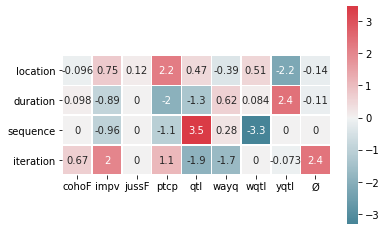

In [12]:
heatmap(vf_fs, annot=True)

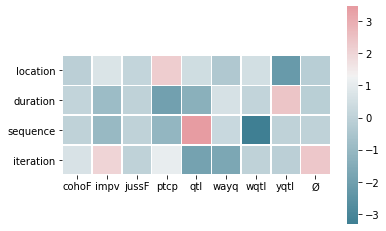

In [13]:
heatmap(vf_fs, center=1.3)

## Examples of qtl + seq

In [14]:
df_cl[
    (df_cl.verbform == 'qtl')
    & (df_cl.quality == 'sequence')
][['verse', 'clause', 'verb_text']].head(10)

,verse,clause,verb_text
node,,,
428404,Genesis 10:32,וּמֵאֵ֜לֶּה נִפְרְד֧וּ הַגֹּויִ֛ם בָּאָ֖רֶץ אַ...,נפרדו
430797,Genesis 30:30,אֲשֶׁר־הָיָ֨ה לְךָ֤ לְפָנַי֙,היה
433230,Genesis 48:6,אֲשֶׁר־הֹולַ֥דְתָּ אַחֲרֵיהֶ֖ם,הולדת
433499,Genesis 50:16,אָבִ֣יךָ צִוָּ֔ה לִפְנֵ֥י מֹותֹ֖ו,צוה
434635,Exodus 10:14,לְ֠פָנָיו לֹא־הָ֨יָה כֵ֤ן אַרְבֶּה֙ כָּמֹ֔הוּ,היה
448370,Deuteronomy 31:29,כִּ֣י יָדַ֗עְתִּי אַחֲרֵ֤י מֹותִי֙,ידעתי
451086,Joshua 24:31,אֲשֶׁ֨ר הֶאֱרִ֤יכוּ יָמִים֙ אַחֲרֵ֣י יְהֹושֻׁ֔עַ,האריכו
461659,1_Kings 3:12,אֲשֶׁ֤ר כָּמֹ֨וךָ֙ לֹא־הָיָ֣ה לְפָנֶ֔יךָ,היה
463194,1_Kings 13:33,אַחַר֙ הַדָּבָ֣ר הַזֶּ֔ה לֹֽא־שָׁ֥ב יָרָבְעָ֖ם...,שׁב


## Examples of yqtl + dur

In [15]:
df_cl[
    (df_cl.verbform == 'yqtl')
    & (df_cl.quality == 'duration')
][['verse', 'clause', 'verb_text']].head(10)

,verse,clause,verb_text
node,,,
427835,Genesis 3:14,וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃,תאכל
427851,Genesis 3:17,בְּעִצָּבֹון֙ תֹּֽאכֲלֶ֔נָּה כֹּ֖ל יְמֵ֥י חַיּ...,תאכלנה
428066,Genesis 6:3,לֹֽא־יָדֹ֨ון רוּחִ֤י בָֽאָדָם֙ לְעֹלָ֔ם,ידון
428260,Genesis 8:22,עֹ֖ד כָּל־יְמֵ֣י הָאָ֑רֶץ זֶ֡רַע וְ֠קָצִיר וְק...,ישׁבתו׃
430615,Genesis 29:18,אֶֽעֱבָדְךָ֙ שֶׁ֣בַע שָׁנִ֔ים בְּרָחֵ֥ל בִּתְּ...,אעבדך
430646,Genesis 29:27,אֲשֶׁ֣ר תַּעֲבֹ֣ד עִמָּדִ֔י עֹ֖וד שֶֽׁבַע־שָׁנ...,תעבד
431215,Genesis 32:33,עַל־כֵּ֡ן לֹֽא־יֹאכְל֨וּ בְנֵֽי־יִשְׂרָאֵ֜ל אֶ...,יאכלו
434597,Exodus 10:7,עַד־מָתַי֙ יִהְיֶ֨ה זֶ֥ה לָ֨נוּ֙ לְמֹוקֵ֔שׁ,יהיה
434763,Exodus 12:10,וְלֹא־תֹותִ֥ירוּ מִמֶּ֖נּוּ עַד־בֹּ֑קֶר,תותירו


### Examples of qatal + duration

In [16]:
ts.show(
df_cl[
    (df_cl.verbform == 'qtl')
    & (df_cl.quality == 'duration')
][['verse', 'clause', 'verb_utf8']]
, spread=25)

showing 25 of 182


,verse,clause,verb_utf8
node,,,
428203,Genesis 8:5,וְהַמַּ֗יִם הָיוּ֙ הָלֹ֣וךְ וְחָסֹ֔ור עַ֖ד הַחֹ֣דֶשׁ הָֽעֲשִׂירִ֑י,היה
435375,Exodus 16:28,עַד־אָ֨נָה֙ מֵֽאַנְתֶּ֔ם,מאן
448711,Deuteronomy 34:6,וְלֹֽא־יָדַ֥ע אִישׁ֙ אֶת־קְבֻ֣רָתֹ֔ו עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,ידע
449743,Joshua 10:9,כָּל־הַלַּ֕יְלָה עָלָ֖ה מִן־הַגִּלְגָּֽל׃,עלה
451453,Judges 4:3,וְ֠הוּא לָחַ֞ץ אֶת־בְּנֵ֧י יִשְׂרָאֵ֛ל בְּחָזְקָ֖ה עֶשְׂרִ֥ים שָׁנָֽה׃ ס,לחץ
454438,1_Samuel 4:18,וְה֛וּא שָׁפַ֥ט אֶת־יִשְׂרָאֵ֖ל אַרְבָּעִ֥ים שָׁנָֽה׃,שׁפט
458621,2_Samuel 6:23,לֹֽא־הָ֥יָה לָ֖הּ יָ֑לֶד עַ֖ד יֹ֥ום מֹותָֽהּ׃ פ,היה
462723,1_Kings 11:16,כִּ֣י שֵׁ֧שֶׁת חֳדָשִׁ֛ים יָֽשַׁב־שָׁ֥ם יֹואָ֖ב וְכָל־יִשְׂרָאֵ֑ל,ישׁב
463447,1_Kings 15:32,וּמִלְחָמָ֨ה הָיְתָ֜ה בֵּ֣ין אָסָ֗א וּבֵ֛ין בַּעְשָׁ֥א מֶֽלֶךְ־יִשְׂרָאֵ֖ל כָּל־יְמֵיהֶֽם׃ פ,היה


## Test with Front Included

In [17]:
fr_ct = df_cl.pivot_table(
    index=['front_etcbc', 'quality'],
    columns=['verbform'],
    aggfunc='size',
    fill_value=0,
)

fr_ct = fr_ct.loc[fr_ct.sum(1).sort_values(ascending=False).index]
fr_ct = fr_ct.loc[fr_ct.sum(1) >= 5]
fr_ct = fr_ct.drop(['infc', 'infa'], axis=1)

fr_ct

,verbform,cohoF,impv,jussF,ptcp,qtl,wayq,wqtl,yqtl,Ø
front_etcbc,quality,,,,,,,,,
B,location,7,20,5,46,209,201,107,224,81
Ø,duration,2,7,1,12,105,114,35,104,37
<D,duration,0,6,1,14,35,48,39,83,26
Ø,location,1,10,1,53,80,8,10,41,36
L,duration,5,3,2,10,13,4,9,72,14
MN,duration,0,0,0,9,27,1,0,1,7
L,location,0,0,1,3,3,8,1,14,3
Ø,sequence,0,0,0,2,20,4,0,5,2
K,location,0,7,0,2,7,1,0,10,2


In [18]:
fr_dp = sig.apply_deltaP(fr_ct, 0, 1)

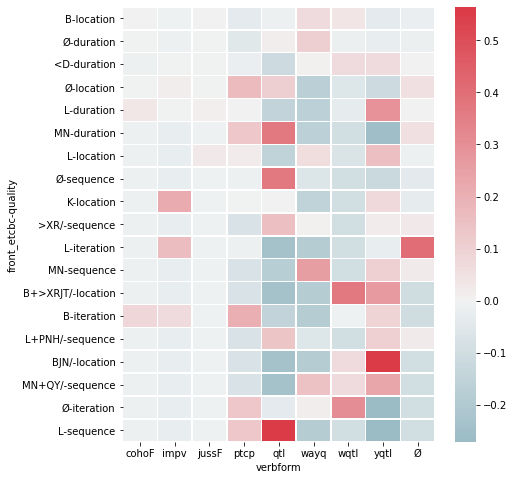

In [19]:
fig, ax = plt.subplots(figsize=(7, 8))
heatmap(fr_dp, ax=ax, square=False)

In [20]:
fr_dp2 = sig.apply_deltaP(fr_ct, 1, 0) # <- NB flipped

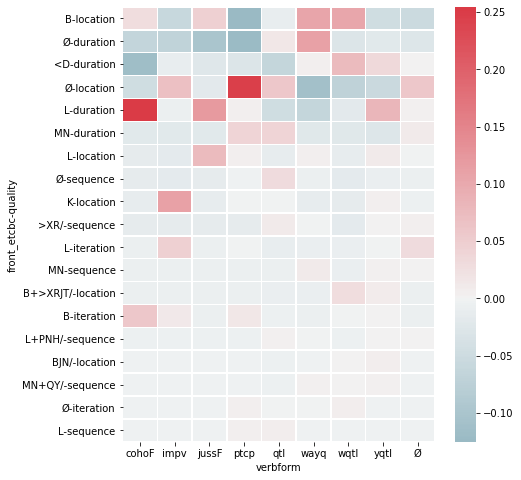

In [21]:
fig, ax = plt.subplots(figsize=(7, 8))
heatmap(fr_dp2, ax=ax, square=False)

In [22]:
fr_fs, fr_odds = sig.apply_fishers(fr_ct, 0, 1)

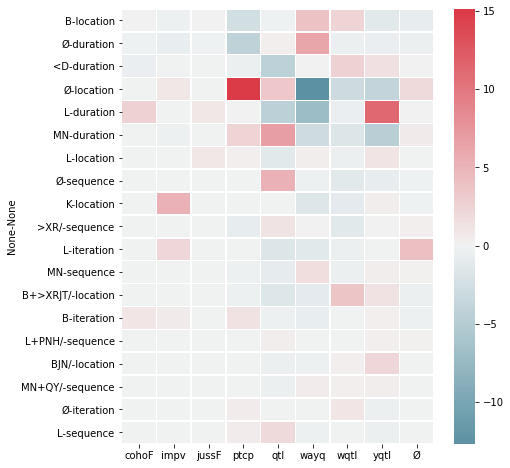

In [23]:
fig, ax = plt.subplots(figsize=(7, 8))
heatmap(fr_fs, ax=ax, square=False)

# Verb Stem

In [24]:
df_cl.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'firstw', 'genre', 'domain', 'gendom', 'clause', 'sentence', 'cl_rela',
       'cl_type', 'cl_kind', 'verb', 'verb_etcbc', 'verb_utf8', 'verb_text',
       'verbform', 'verb_stem', 'cl_args', 'has_objc', 'has_cmpl', 'has_subj',
       'has_oc', 'Time Position', 'cl_type2', 'cl_nsuccs', 'cl_clust50',
       'cl_clust10', 'verbtense', 'vt_order', 'PP', 'front_etcbc', 'front',
       'tag', 'unmodified', 'has_time', 'APPO', 'DEF', 'ORDN', 'ØPP', 'GP',
       'QUANT', 'PL', 'NUM', 'PARA', 'DEMON', 'demon_type', 'ADJV', 'TIMEAPPO',
       'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [25]:
stem_ct = df_cl.pivot_table(
    index='quality',
    columns='verb_stem',
    aggfunc='size',
    fill_value=0,
)

stem_ct = stem_ct.drop(['htpo', 'hof', 'pual'], axis=1)

stem_ct

verb_stem,hif,hit,nif,piel,qal
quality,,,,,
duration,65,22,54,57,610
iteration,5,0,2,3,15
location,178,17,81,114,759
sequence,27,0,7,8,53


In [26]:
stem_pr = stem_ct.div(stem_ct.sum(1), 0)

stem_pr

verb_stem,hif,hit,nif,piel,qal
quality,,,,,
duration,0.080446,0.027228,0.066832,0.070545,0.754950
iteration,0.200000,0.000000,0.080000,0.120000,0.600000
location,0.154917,0.014795,0.070496,0.099217,0.660574
sequence,0.284211,0.000000,0.073684,0.084211,0.557895


In [27]:
stem_pr2 = stem_ct.T.div(stem_ct.T.sum(1), 0)

stem_pr2

quality,duration,iteration,location,sequence
verb_stem,,,,
hif,0.236364,0.018182,0.647273,0.098182
hit,0.564103,0.000000,0.435897,0.000000
nif,0.375000,0.013889,0.562500,0.048611
piel,0.313187,0.016484,0.626374,0.043956
qal,0.424495,0.010438,0.528184,0.036882


In [28]:
stem_fs, stem_odds = sig.apply_fishers(stem_ct, 0, 1)

stem_fs

,hif,hit,nif,piel,qal
duration,-7.885908,1.519664,-0.102093,-1.502671,6.195388
iteration,0.437354,0.000000,0.160840,0.321684,-0.416957
location,3.058836,-0.835621,0.064385,1.374121,-3.235335
sequence,4.196081,-0.588464,0.078047,0.000000,-2.222101


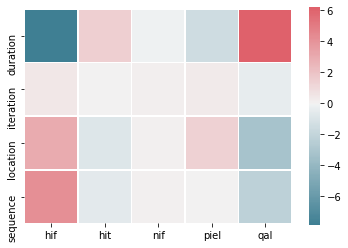

In [29]:
heatmap(stem_fs)

In [30]:
stem_dp = sig.apply_deltaP(stem_ct, 0, 1)

stem_dp

verb_stem,hif,hit,nif,piel,qal
quality,,,,,
duration,-0.085039,0.013831,-0.004090,-0.027958,0.103256
iteration,0.068421,-0.019006,0.010799,0.032768,-0.092982
location,0.050391,-0.008911,0.002608,0.025941,-0.070029
sequence,0.159084,-0.019677,0.004562,-0.003580,-0.140390


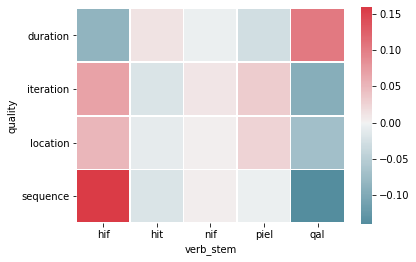

In [31]:
fig, ax = plt.subplots()
heatmap(stem_dp)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

In [32]:
# DP test from the direction of the verb stem
stem_dp2 = sig.apply_deltaP(stem_ct.T, 0, 1)

stem_dp2

quality,duration,iteration,location,sequence
verb_stem,,,,
hif,-0.175956,0.007083,0.108427,0.060446
hit,0.178430,-0.012267,-0.119549,-0.046614
nif,-0.015067,0.001990,0.009991,0.003086
piel,-0.083119,0.004874,0.080199,-0.001954
qal,0.115120,-0.005187,-0.081191,-0.028743


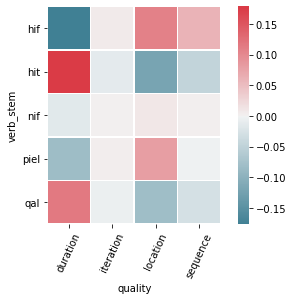

In [33]:
fig, ax = plt.subplots()
heatmap(stem_dp2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

### Hitpael + time

In [34]:
df_cl[
    (df_cl.verb_stem == 'hit')
    & (df_cl.quality == 'duration')
][['verse', 'clause', 'verb_text']]

,verse,clause,verb_text
node,,,
428030,Genesis 5:22,וַיִּתְהַלֵּ֨ךְ חֲנֹ֜וךְ אֶת־הָֽאֱלֹהִ֗ים שְׁל...,יתהלך
431795,Genesis 37:34,וַיִּתְאַבֵּ֥ל עַל־בְּנֹ֖ו יָמִ֥ים רַבִּֽים׃,יתאבל
448740,Joshua 1:5,לֹֽא־יִתְיַצֵּ֥ב אִישׁ֙ לְפָנֶ֔יךָ כֹּ֖ל יְמֵ֣...,יתיצב
450410,Joshua 18:3,עַד־אָ֨נָה֙ אַתֶּ֣ם מִתְרַפִּ֔ים,מתרפים
450789,Joshua 22:17,אֲשֶׁ֤ר לֹֽא־הִטַּהַ֨רְנוּ֙ מִמֶּ֔נּוּ עַ֖ד הַ...,הטהרנו
453065,Judges 16:2,וַיִּתְחָרְשׁ֤וּ כָל־הַלַּ֨יְלָה֙,יתחרשׁו
454000,1_Samuel 1:14,עַד־מָתַ֖י תִּשְׁתַּכָּרִ֑ין,תשׁתכרין
454198,1_Samuel 2:30,בֵּֽיתְךָ֙ וּבֵ֣ית אָבִ֔יךָ יִתְהַלְּכ֥וּ לְפָ...,יתהלכו
454220,1_Samuel 2:35,וְהתְהַלֵּ֥ךְ לִפְנֵֽי־מְשִׁיחִ֖י כָּל־הַיָּמִ...,התהלך


In [35]:
df_cl[
    (df_cl.verb_stem == 'hit')
    & (df_cl.quality == 'location')
][['verse', 'clause', 'verb_text']]

,verse,clause,verb_text
node,,,
427805,Genesis 3:8,מִתְהַלֵּ֥ךְ בַּגָּ֖ן לְר֣וּחַ הַיֹּ֑ום,מתהלך
443027,Numbers 19:12,ה֣וּא יִתְחַטָּא־בֹ֞ו בַּיֹּ֧ום הַשְּׁלִישִׁ֛י,יתחטא־
443029,Numbers 19:12,וְאִם־לֹ֨א יִתְחַטָּ֜א בַּיֹּ֧ום הַשְּׁלִישִׁ֛י,יתחטא
445274,Deuteronomy 3:23,וָאֶתְחַנַּ֖ן אֶל־יְהוָ֑ה בָּעֵ֥ת הַהִ֖וא,אתחנן
446012,Deuteronomy 9:20,וָֽאֶתְפַּלֵּ֛ל גַּם־בְּעַ֥ד אַהֲרֹ֖ן בָּעֵ֥ת ...,אתפלל
453701,Judges 20:15,וַיִּתְפָּֽקְדוּ֩ בְנֵ֨י בִנְיָמִ֜ן בַּיֹּ֤ום ...,יתפקדו
453935,Judges 21:24,וַיִּתְהַלְּכ֨וּ מִשָּׁ֤ם בְּנֵֽי־יִשְׂרָאֵל֙ ...,יתהלכו
456277,1_Samuel 18:21,בִּשְׁתַּ֛יִם תִּתְחַתֵּ֥ן בִּ֖י הַיֹּֽום׃,תתחתן
460302,2_Samuel 19:4,וַיִּתְגַּנֵּ֥ב הָעָ֛ם בַּיֹּ֥ום הַה֖וּא,יתגנב


# Verbform x Modifiers

In [36]:
df_cl.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'firstw', 'genre', 'domain', 'gendom', 'clause', 'sentence', 'cl_rela',
       'cl_type', 'cl_kind', 'verb', 'verb_etcbc', 'verb_utf8', 'verb_text',
       'verbform', 'verb_stem', 'cl_args', 'has_objc', 'has_cmpl', 'has_subj',
       'has_oc', 'Time Position', 'cl_type2', 'cl_nsuccs', 'cl_clust50',
       'cl_clust10', 'verbtense', 'vt_order', 'PP', 'front_etcbc', 'front',
       'tag', 'unmodified', 'has_time', 'APPO', 'DEF', 'ORDN', 'ØPP', 'GP',
       'QUANT', 'PL', 'NUM', 'PARA', 'DEMON', 'demon_type', 'ADJV', 'TIMEAPPO',
       'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [37]:
modi_ct = df_cl.pivot_table(
    index=['verbform'],
    values=['DEF', 'ORDN', 'QUANT', 'PL', 'NUM', 'DEMON', 'SFX', 'unmodified'],
    aggfunc='sum',
    fill_value=0,
)

modi_ct = modi_ct.drop(['infa', 'infc'], axis=0)

In [38]:
modi_ct

,DEF,DEMON,NUM,ORDN,PL,QUANT,SFX,unmodified
verbform,,,,,,,,
cohoF,3,1,0,0,4,2,5,6
impv,39,1,7,4,10,4,0,8
jussF,2,0,1,0,2,0,0,2
ptcp,99,18,3,4,23,16,9,22
qtl,236,104,91,20,146,40,49,42
wayq,259,136,102,31,90,33,8,18
wqtl,143,62,34,18,51,17,7,21
yqtl,267,97,72,35,146,59,39,141
Ø,121,23,18,20,57,22,11,39


In [39]:
modi_fs, modi_odds = sig.apply_fishers(modi_ct, 0, 1)

modi_fs

,DEF,DEMON,NUM,ORDN,PL,QUANT,SFX,unmodified
cohoF,-1.402044,-0.461920,-0.580289,0.000000,0.115663,0.441864,2.951597,2.002216
impv,2.535840,-3.376249,0.000000,0.266343,-0.198958,0.000000,-0.927755,0.264684
jussF,0.000000,-0.219433,0.276593,0.000000,0.490126,0.000000,0.000000,0.879068
ptcp,4.701416,-1.173539,-5.713567,-0.725960,-1.052503,0.789748,0.244147,0.512849
qtl,-1.849889,0.204478,1.668259,-1.368524,2.507574,-0.225970,4.282844,-3.826821
wayq,0.615420,6.665725,5.228325,0.290272,-1.849683,-0.695380,-5.390878,-13.017276
wqtl,1.051188,1.485262,-0.107926,0.496952,-0.491714,-0.392919,-1.371962,-1.706243
yqtl,-3.516225,-1.757898,-1.320625,0.000000,0.256236,0.683033,0.510830,14.882904
Ø,0.493049,-3.449896,-2.254225,1.457155,0.475335,0.420451,-0.056391,1.301155


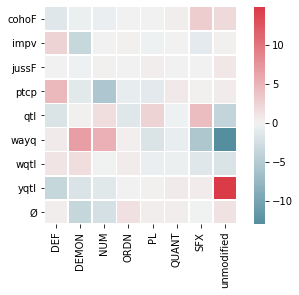

In [40]:
heatmap(modi_fs)

In [41]:
modi_dp = sig.apply_deltaP(modi_ct.T, 0, 1)

modi_dp

verbform,cohoF,impv,jussF,ptcp,qtl,wayq,wqtl,yqtl,Ø
DEF,-0.006210,0.016785,-0.000727,0.038369,-0.038001,0.017754,0.019938,-0.058777,0.010870
DEMON,-0.004937,-0.023655,-0.002520,-0.022631,0.010672,0.112948,0.035520,-0.053761,-0.051636
NUM,-0.007261,-0.001480,0.000974,-0.056898,0.057176,0.112151,-0.006646,-0.051580,-0.046436
ORDN,-0.006801,0.007958,-0.002267,-0.031225,-0.077759,0.025652,0.027879,-0.000716,0.057279
PL,0.001244,-0.004508,0.001923,-0.020067,0.059716,-0.048002,-0.015818,0.012150,0.013362
QUANT,0.004086,-0.002069,-0.002313,0.024097,-0.020034,-0.041767,-0.022918,0.042402,0.018516
SFX,0.033888,-0.023609,-0.002264,0.010481,0.163214,-0.153865,-0.057214,0.040457,-0.011087
unmodified,0.014932,0.004503,0.004977,0.014695,-0.094383,-0.165407,-0.043426,0.226793,0.037316


### What % of yqtl + L is future?

In [42]:
yqtl = df_cl[
    (df_cl.verbform == 'yqtl')
    & (df_cl.unmodified == 0)
]

yqtl.shape

(487, 72)

In [43]:
yqtl

,verse,book,booksuper,canon_part,period,times_etcbc,times_utf8,times_utf8d,times_POS,TA Heads,...,ADJV,TIMEAPPO,SPEC,SFX3,SFX,DU,SFX1,SFX2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427835,Genesis 3:14,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427851,Genesis 3:17,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428260,Genesis 8:22,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428989,Genesis 18:10,Genesis,Genesis,Law,SBH,<T/,עת,תע,NOUN,\texthebrew{עת},...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
429263,Genesis 19:34,Genesis,Genesis,Law,SBH,LJLH/,לילה,הליל,NOUN,\texthebrew{לילה},...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509791,Nehemiah 13:19,Nehemiah,Ezra-Neh,Writings,LBH,CBT/,שׁבת,תבש,NOUN,\texthebrew{שבת},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509793,Nehemiah 13:19,Nehemiah,Ezra-Neh,Writings,LBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511726,1_Chronicles 22:9,1_Chronicles,Chronicles,Writings,LBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
yqtl_tense = yqtl.pivot_table(
    index=['verbtense'],
    columns=['unmodified'],
    aggfunc='size',
    fill_value=0,
)

In [45]:
yqtl_tense

unmodified,0
verbtense,
FUT,121
HAB used to,1
IMPV,12
MOD can,4
MOD is to,3
MOD lest,1
MOD let,16
MOD may,14
MOD might,1


In [46]:
pr_yqtl_mod = yqtl_tense.T.div(yqtl_tense.T.sum(1), 0)

pr_yqtl_mod

verbtense,FUT,HAB used to,IMPV,MOD can,MOD is to,MOD lest,MOD let,MOD may,MOD might,MOD must,MOD shall,MOD should,MOD was to,MOD would,PAST,PAST PERF,PRES,PRES PART,PRES shall,TO INF
unmodified,,,,,,,,,,,,,,,,,,,,
0,0.2569,0.002123,0.025478,0.008493,0.006369,0.002123,0.03397,0.029724,0.002123,0.008493,0.416136,0.016985,0.002123,0.002123,0.023355,0.002123,0.14862,0.004246,0.002123,0.006369


In [47]:
pr_yqtl_dp = sig.apply_deltaP(yqtl_tense.T, 0, 1)

pr_yqtl_dp

verbtense,FUT,HAB used to,IMPV,MOD can,MOD is to,MOD lest,MOD let,MOD may,MOD might,MOD must,MOD shall,MOD should,MOD was to,MOD would,PAST,PAST PERF,PRES,PRES PART,PRES shall,TO INF
unmodified,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
yqtl.unmodified.value_counts()

0    487
Name: unmodified, dtype: int64

In [49]:
df_cl.unmodified.value_counts()

0    2136
1     314
Name: unmodified, dtype: int64